In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import spacy
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re


In [3]:
df = pd.read_csv('avis_corr.csv')

In [5]:
del(df["Unnamed: 0"])

In [6]:
df

note              auteur  \
0       5.0    brahim--k-131532   
1       4.0    bernard-g-112497   
2       5.0   virginie-t-107352   
3       4.0    boulain-f-116580   
4       1.0     ouaille31-51798   
...     ...                 ...   
23505   1.0         sapho-95707   
23506   4.0  christian-l-107138   
23507   1.0     gilbert23-56215   
23508   1.0       hophop-107522   
23509   1.0           tzl-81680   

                                                    avis  \
0      Meilleurs assurances, prix, solutions, écoute,...   
1      je suis globalement satisfait , sauf que vous ...   
2      Prix tres abordable plusieurs options s'offren...   
3      je satisfait du service, une réponse très rapi...   
4      Client depuis plus de 25 ans, très déçu de cet...   
...                                                  ...   
23505  Bonjour,\n\nAprès des années de cotisations (~...   
23506  je suis satisfait du service\nsimple et rapide...   
23507  Odieux et irrespectueux.  Tarifs compétitifs a...   
23508  Assurance moto chez la mutuel des motards en F...   
23509  Même les demandes les plus simples n'aboutisse...   

                   assureur     produit   type date_publication    date_exp  \
0          Direct Assurance        auto  train       06/09/2021  01/09/2021   
1          Direct Assurance        auto  train       03/05/2021  01/05/2021   
2          Direct Assurance        auto  train       21/03/2021  01/03/2021   
3       L'olivier Assurance        auto  train       10/06/2021  01/06/2021   
4                    Matmut        auto  train       29/01/2017  01/01/2017   
...                     ...         ...    ...              ...         ...   
23505                  Mgen       sante  train       30/07/2020  01/07/2020   
23506      Direct Assurance        auto  train       19/03/2021  01/03/2021   
23507               Eurofil        auto  train       24/07/2017  01/07/2017   
23508  Mutuelle des Motards        moto  train       22/03/2021  01/03/2021   
23509               Allianz  habitation  train       06/12/2019  01/12/2019   

                                                 avis_en  \
0      Best insurance, price, solutions, listening, s...   
1      I am generally satisfied, except that you have...   
2      Very affordable price Several options are avai...   
3      I satisfy the service, a very fast response fr...   
4      Customer for more than 25 years, very disappoi...   
...                                                  ...   
23505  Hello,\n\nAfter years of contributions (~ 50 y...   
23506  I am satisfied with the service\nsimple and fa...   
23507  Odious and disrespectful. Competitive prices a...   
23508  Motorcycle insurance at the biker mutual in sh...   
23509  Even the simplest requests do not succeed. Imp...   

                                                avis_cor  \
0      Meilleurs assurances , prix , solutions , écou...   
1      je suis globalement satisfait , sauf que vous ...   
2      Prix tres abordable plusieurs options s'offren...   
3      je satisfait du service , une réponse très rap...   
4      Client depuis plus de 25 ans , très déçu de ce...   
...                                                  ...   
23505  Bonjour , Après des années de cotisations ( ~5...   
23506  je suis satisfait du service simple et rapide ...   
23507  Odieux et irrespectueux . Tarifs compétitifs a...   
23508  Assurance moto chez la mutuel des motards en R...   
23509  Même les demandes les plus simples n'aboutisse...   

                                             avis_cor_en  
0      Best insurance , price , solutions , listening...  
1      I am generally satisfied , except that you hav...  
2      Very affordable price Several options are avai...  
3      I satisfy the service , a very fast response f...  
4      Customer for more than 25 years , very disappo...  
...                                                  ...  
23505  Hello , After years of contributions ( ~ 50 ye...  
23

In [5]:
df.produit.value_counts()

produit
auto                                     13727
sante                                     3437
moto                                      2063
habitation                                1914
prevoyance                                 766
credit                                     639
vie                                        556
animaux                                    364
multirisque-professionnelle                 19
garantie-decennale                          11
assurances-professionnelles                  8
responsabilite-civile-professionnelle        5
flotte-automobile                            1
Name: count, dtype: int64

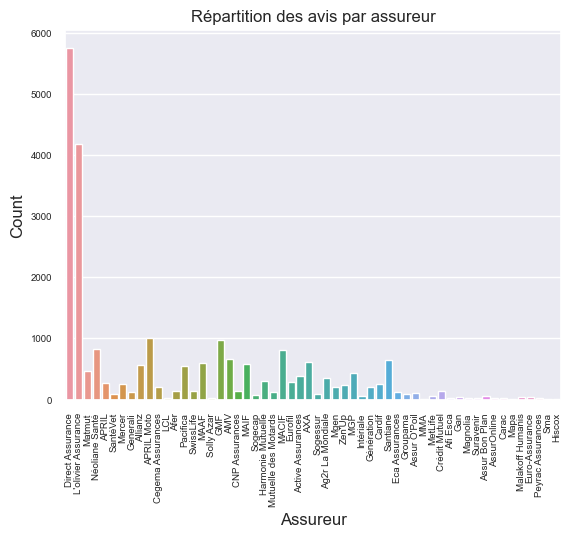

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.countplot(x='assureur', data=df)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xlabel('Assureur')
plt.ylabel('Count')
plt.title('Répartition des avis par assureur')

plt.show()


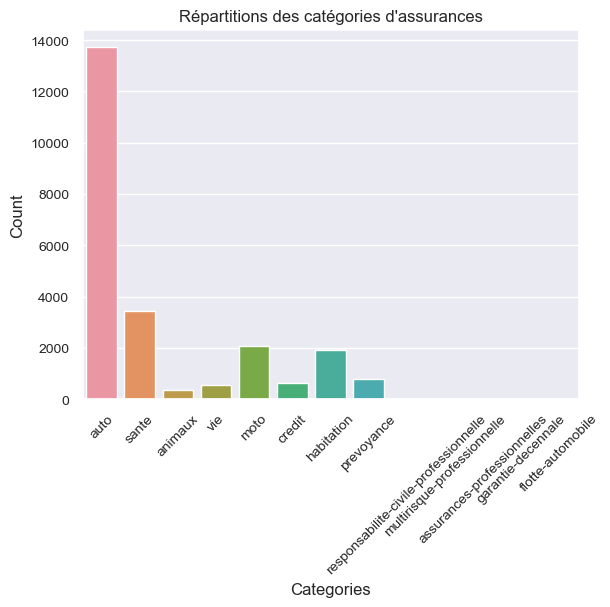

In [75]:
sns.set(style="darkgrid")
sns.countplot(x='produit', data=df)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title("Répartitions des catégories d'assurances")

plt.show()

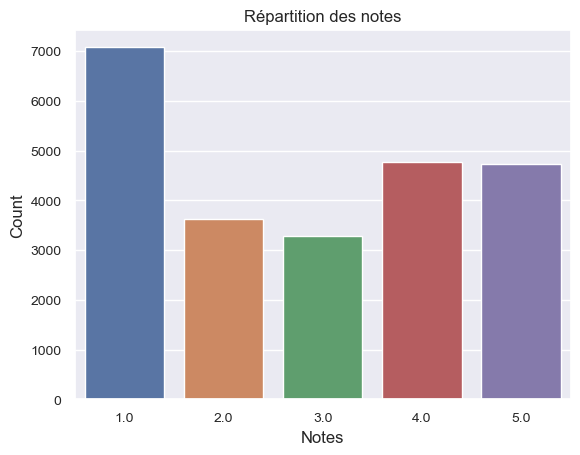

In [73]:
sns.set(style="darkgrid")
sns.countplot(x='note', data=df)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Notes')
plt.ylabel('Count')
plt.title('Répartition des notes')

plt.show()

In [36]:
def text2TokenList_fr(text):
	stopword = stopwords.words('french')
	word_tokens = word_tokenize(text.lower())
	word_tokens_without_stops = [word for word in word_tokens if word not in stopword and len(word)>2]
	return word_tokens_without_stops


In [37]:
def text2TokenList_en(text):
	stopword = stopwords.words('english')
	word_tokens = word_tokenize(text.lower())
	word_tokens_without_stops = [word for word in word_tokens if word not in stopword and len(word)>2]
	return word_tokens_without_stops


In [20]:
nlp_fr = spacy.load('fr_core_news_sm')

def clean_string_fr(text,stem="None"):
    


    final_string = ""
    text = text.lower()

    text = re.sub(r'\n', '', text)
    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words('french')
    useless_words = useless_words

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [21]:
nlp = spacy.load('en_core_web_sm')
def clean_string_en(text,stem="None"):

    final_string = ""
    text = text.lower()

    text = re.sub(r'\n', '', text)
    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words('english')
    useless_words = useless_words

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [24]:
df['avis_clean_fr']=df["avis_cor"].apply(clean_string_fr)

In [26]:
df['avis_clean_en']=df["avis_cor_en"].apply(clean_string_en)

In [38]:
df['avis_token_fr']=df["avis_clean_fr"].apply(text2TokenList_fr)

In [39]:
df['avis_token_en']=df["avis_clean_en"].apply(text2TokenList_en)

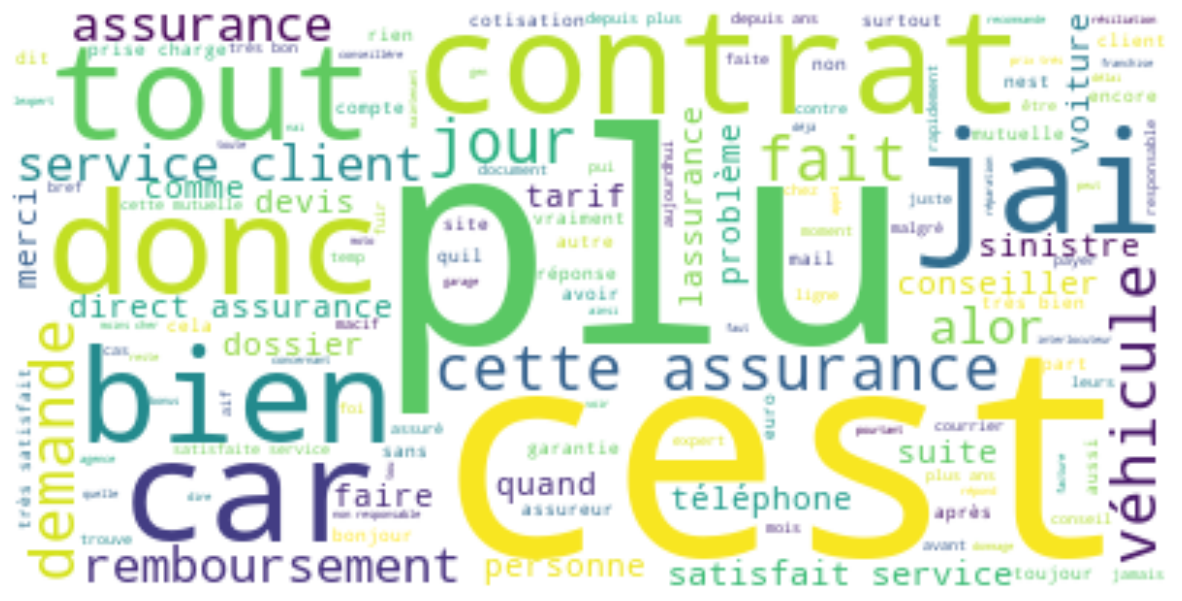

In [40]:
text = " ".join(" ".join(df.avis_token_fr.iloc[i]) for i in range(len(df.avis_token_fr)))
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
def text2TokenList2_fr(text):
	stopword = stopwords.words('french')
	stopword.extend(["cest","plus",'alors',"car","donc","jai","cette",'tout','cela','comme'])
	word_tokens = word_tokenize(text.lower())
	word_tokens_without_stops = [word for word in word_tokens if word not in stopword and len(word)>2]
	return word_tokens_without_stops


In [51]:
df['avis_token_fr']=df["avis_clean_fr"].apply(text2TokenList2_fr)

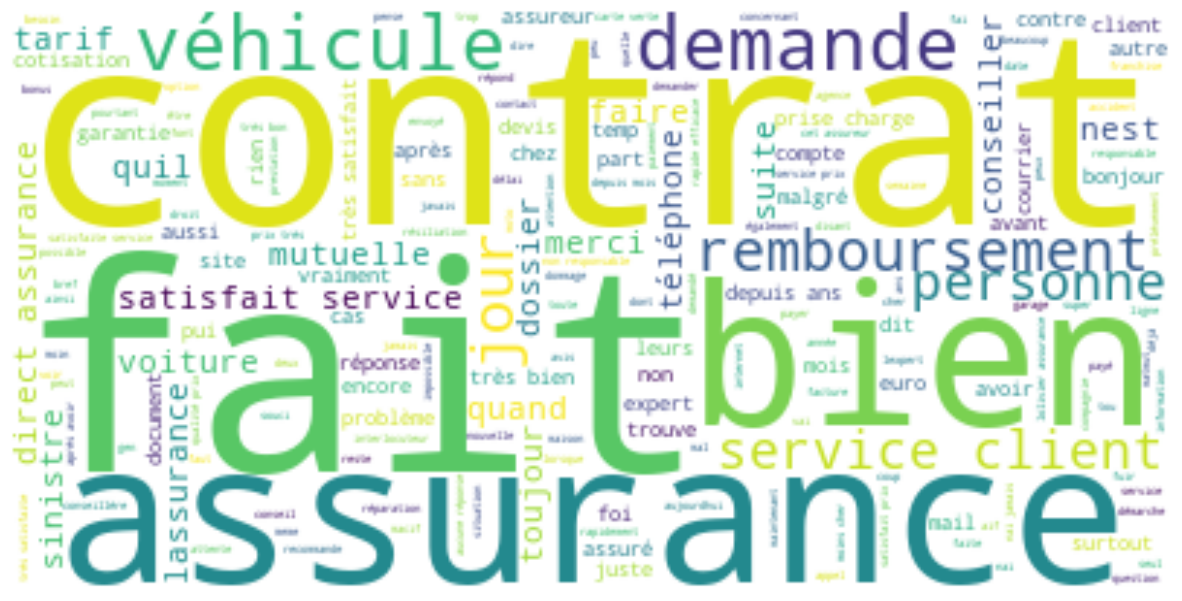

In [52]:
text = " ".join(" ".join(df.avis_token_fr.iloc[i]) for i in range(len(df.avis_token_fr)))
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

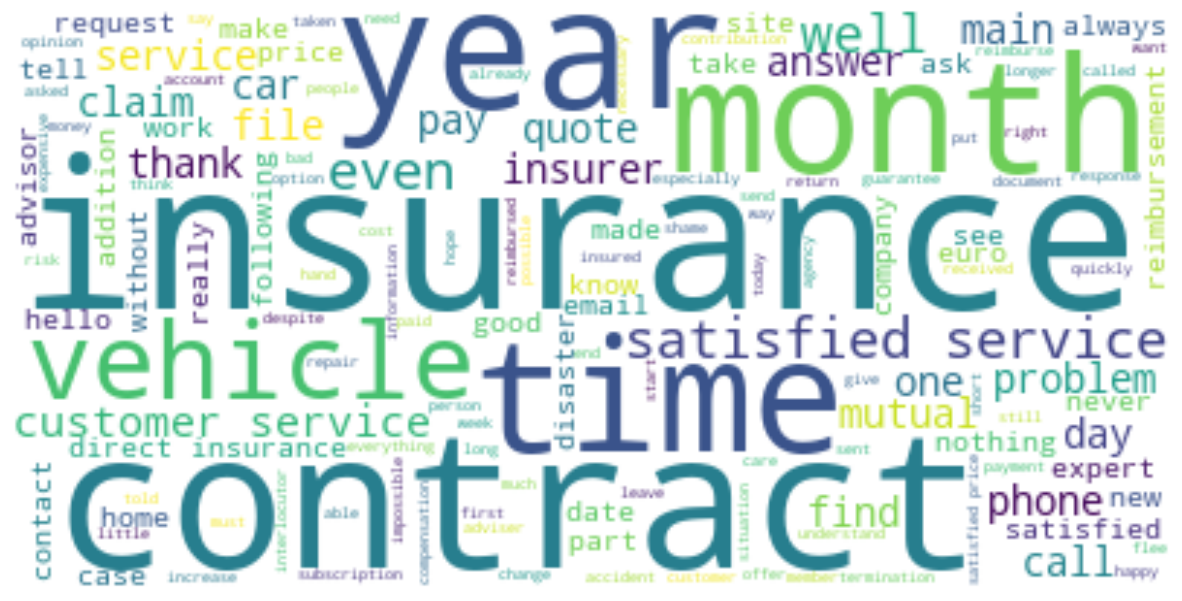

In [53]:
text = " ".join(" ".join(df.avis_token_en.iloc[i]) for i in range(len(df.avis_token_en)))
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
import itertools

a=list(df.avis_token_fr)
list_of_w = list(itertools.chain.from_iterable(a))


In [56]:
from nltk.util import ngrams

bigrams = ngrams(list_of_w, 2)
for bigram in bigrams:
    print(bigram)

('meilleurs', 'assurances')
('assurances', 'prix')
('prix', 'solutions')
('solutions', 'écoute')
('écoute', 'rapidité')
('rapidité', 'recommande')
('recommande', 'compagnie')
('compagnie', 'prix')
('prix', 'attractif')
('attractif', 'services')
('services', 'qualité')
('qualité', 'rapidité')
('rapidité', 'globalement')
('globalement', 'satisfait')
('satisfait', 'sauf')
('sauf', 'problème')
('problème', 'site')
('site', 'internet')
('internet', 'impossible')
('impossible', 'déclarer')
('déclarer', 'sinistre')
('sinistre', 'ligne')
('ligne', 'après')
('après', 'plusieurs')
('plusieurs', 'tentatives')
('tentatives', 'déclaration')
('déclaration', 'faite')
('faite', 'téléphone')
('téléphone', 'très')
('très', 'bien')
('bien', 'passé')
('passé', 'interlocutrice')
('interlocutrice', 'compétente')
('compétente', 'très')
('très', 'agréable')
('agréable', 'prix')
('prix', 'tres')
('tres', 'abordable')
('abordable', 'plusieurs')
('plusieurs', 'options')
('options', 'soffrent')
('soffrent', 'boit

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
bigrams = ngrams(list_of_w, 3)
for bigram in bigrams:
    print(bigram)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('rapport', 'qualité', 'prix')
('qualité', 'prix', 'prestation')
('prix', 'prestation', 'convenable')
('prestation', 'convenable', 'prise')
('convenable', 'prise', 'charge')
('prise', 'charge', 'téléphonique')
('charge', 'téléphonique', 'rapide')
('téléphonique', 'rapide', 'personnes')
('rapide', 'personnes', 'bout')
('personnes', 'bout', 'fil')
('bout', 'fil', 'très')
('fil', 'très', 'courtoises')
('très', 'courtoises', 'bienveillantes')
('courtoises', 'bienveillantes', 'rien')
('bienveillantes', 'rien', 'dire')
('rien', 'dire', 'tres')
('dire', 'tres', 'contraignant')
('tres', 'contraignant', 'avoir')
('contraignant', 'avoir', 'bureau')
('avoir', 'bureau', 'toulon')
('bureau', 'toulon', '.pourtant')
('toulon', '.pourtant', 'tous')
('.pourtant', 'tous', 'fonctionnaires')
('tous', 'fonctionnaires', 'actifs')
('fonctionnaires', 'actifs', 'retraités')
('actifs', 'retraités', 'souhaitable')
('retraités', 'souhaitable', 'rouvrir')
('souhaitable', 'rouvrir', 'bureau')
('rouvrir', 'bureau', 

In [67]:
df_fin=df.drop(columns=['date_publication','avis_en','avis','auteur','type'])

In [68]:
df_fin

note              assureur     produit    date_exp  \
0       5.0      Direct Assurance        auto  01/09/2021   
1       4.0      Direct Assurance        auto  01/05/2021   
2       5.0      Direct Assurance        auto  01/03/2021   
3       4.0   L'olivier Assurance        auto  01/06/2021   
4       1.0                Matmut        auto  01/01/2017   
...     ...                   ...         ...         ...   
23505   1.0                  Mgen       sante  01/07/2020   
23506   4.0      Direct Assurance        auto  01/03/2021   
23507   1.0               Eurofil        auto  01/07/2017   
23508   1.0  Mutuelle des Motards        moto  01/03/2021   
23509   1.0               Allianz  habitation  01/12/2019   

                                                avis_cor  \
0      Meilleurs assurances , prix , solutions , écou...   
1      je suis globalement satisfait , sauf que vous ...   
2      Prix tres abordable plusieurs options s'offren...   
3      je satisfait du service , une réponse très rap...   
4      Client depuis plus de 25 ans , très déçu de ce...   
...                                                  ...   
23505  Bonjour , Après des années de cotisations ( ~5...   
23506  je suis satisfait du service simple et rapide ...   
23507  Odieux et irrespectueux . Tarifs compétitifs a...   
23508  Assurance moto chez la mutuel des motards en R...   
23509  Même les demandes les plus simples n'aboutisse...   

                                             avis_cor_en  \
0      Best insurance , price , solutions , listening...   
1      I am generally satisfied , except that you hav...   
2      Very affordable price Several options are avai...   
3      I satisfy the service , a very fast response f...   
4      Customer for more than 25 years , very disappo...   
...                                                  ...   
23505  Hello , After years of contributions ( ~ 50 ye...   
23506  I am satisfied with the service simple and fas...   
23507  Obvious and disrespectful . Competitive prices...   
23508  Motorcycle insurance at the biker mutual in sh...   
23509  Even the simplest requests do not succeed . Im...   

                                           avis_clean_fr  \
0      meilleurs assurances prix solutions écoute rap...   
1      globalement satisfait sauf problème site inter...   
2      prix tres abordable plusieurs options soffrent...   
3      satisfait service réponse très rapide service ...   
4      client depuis plus  ans très déçu cette mutuel...   
...                                                  ...   
23505  bonjour après années cotisations  ans plus con...   
23506  satisfait service simple rapide recommande dir...   
23507  odieux irrespectueux tarifs compétitifs début ...   
23508  assurance moto chez mutuel motards rte augment...   
23509  demandes plus simples naboutissent impossible ...   

                                           avis_clean_en  \
0      best insurance price solutions listening speed...   
1      generally satisfied except problem website imp...   
2      affordable price several options available us ...   
3      satisfy service fast response service thank ch...   
4      customer  years disappointed mutual longer mut...   
...                                                  ...   
23505  hello years contributions  years plus “ autono...   
23506  satisfied service simple fast recommend direct...   
23507  obvious disrespectful competitive prices first...   
23508  motorcycle insurance biker mutual sharp increa...   
23509  even simplest requests succeed impossible obta...   

                                           avis_token_fr  \
0      [meilleurs, assurances, prix, solutions, écout...   
1      [globalement, satisfait, sauf, problème, site,...   
2      [prix, tres, abordable, plusieurs, options, so...   
3      [satisfait, service, réponse, très, rapide, se...   
4      [client, depuis, ans, très, déçu, mutuelle, ri...   
...                           

In [69]:
df_fin.to_csv("clean_avis_v1.csv")